1.

DataFrame:    t (s)  i (A)
0   1.00   3.10
1   1.01   3.12
2   1.02   3.14
3   1.03   3.18
4   1.04   3.24
Resultados comparativos:    t (s)  i (A)  di/dt Finita  e Finita (V)  di/dt 3p  e 3p (V)  \
0   1.00   3.10           2.0       2.40020       2.0   2.40020   
1   1.01   3.12           2.0       2.40304       2.0   2.40304   
2   1.02   3.14           3.0       3.38588       3.0   3.38588   
3   1.03   3.18           5.0       5.35156       5.0   5.35156   
4   1.04   3.24           6.0       6.34008       7.0   7.32008   

   di/dt Hermite  ε Hermite (V)  Error |Finita - 3p|  Error |Hermite - 3p|  
0            2.0        2.40020         6.528111e-14                   0.0  
1            2.0        2.40304         0.000000e+00                   0.0  
2            3.0        3.38588         0.000000e+00                   0.0  
3            5.0        5.35156         0.000000e+00                   0.0  
4            7.0        7.32008         9.800000e-01                   0.0  


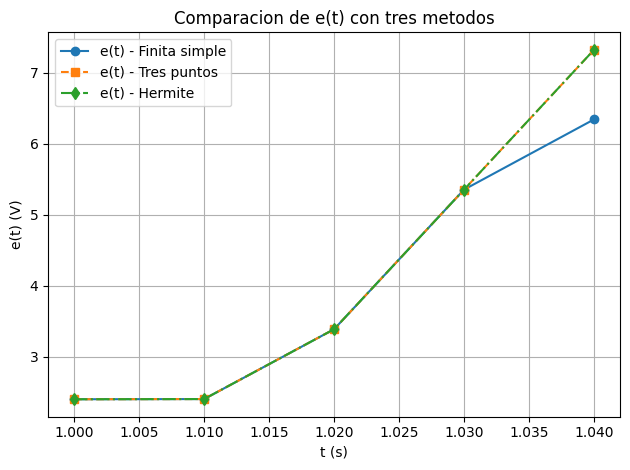

Error RMS (Finita simple vs 3 puntos): 0.438269 V
Error RMS (Hermite vs 3 puntos): 0.000000 V


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline, interp1d
import pandas as pd

# Datos del problema
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo en segundos
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente en Amperios
h = 0.01  # Paso constante

# Constantes
L = 0.98   # Inductancia en Henrys
R = 0.142  # Resistencia en Ohmios

# 1. DataFrame con los datos
df = pd.DataFrame({'t (s)': t, 'i (A)': i})
print("DataFrame:", df)

# 2. Diferencias finitas simples (orden 1)
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def Derivada_Finita_Simple(f, x, h):
    n = len(x)
    fprime = np.zeros_like(x)
    for i in range(n):
        if i == 0:
            fprime[i] = forward_diff(f, x[i], h)
        elif i == n - 1:
            fprime[i] = backward_diff(f, x[i], h)
        else:
            fprime[i] = centered_diff(f, x[i], h)
    return fprime

# 3. Diferencias finitas de tres puntos (orden 2)
def Derivada_Tres_Puntos(f, x, h):
    n = len(x)
    fprime = np.zeros_like(x)
    for i in range(n):
        if i == 0:
            fprime[i] = (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)
        elif i == n - 1:
            fprime[i] = (3 * f(x[i]) - 4 * f(x[i] - h) + f(x[i] - 2 * h)) / (2 * h)
        else:
            fprime[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)
    return fprime

# 4. Interpolador para usarlo como funcion continua
i_interp = interp1d(t, i, kind='cubic', fill_value="extrapolate")

# 5. Derivadas con los tres metodos
di_dt_finitas = Derivada_Finita_Simple(i_interp, t, h)
epsilon_finitas = L * di_dt_finitas + R * i

di_dt_3p = Derivada_Tres_Puntos(i_interp, t, h)
epsilon_3p = L * di_dt_3p + R * i

dy = di_dt_3p  # Usamos derivadas de 3 puntos para Hermite
hermite_poly = CubicHermiteSpline(t, i, dy)
di_dt_hermite = hermite_poly.derivative()(t)
epsilon_hermite = L * di_dt_hermite + R * i

# 6. Tabla de resultados
resultados = pd.DataFrame({
    't (s)': t,
    'i (A)': i,
    'di/dt Finita': di_dt_finitas,
    'e Finita (V)': epsilon_finitas,
    'di/dt 3p': di_dt_3p,
    'e 3p (V)': epsilon_3p,
    'di/dt Hermite': di_dt_hermite,
    'ε Hermite (V)': epsilon_hermite,
    'Error |Finita - 3p|': np.abs(epsilon_finitas - epsilon_3p),
    'Error |Hermite - 3p|': np.abs(epsilon_hermite - epsilon_3p)
})
print("Resultados comparativos:", resultados)

# 7. Gráfica comparativa
plt.plot(t, epsilon_finitas, 'o-', label='e(t) - Finita simple')
plt.plot(t, epsilon_3p, 's--', label='e(t) - Tres puntos')
plt.plot(t, epsilon_hermite, 'd-.', label='e(t) - Hermite')
plt.xlabel('t (s)')
plt.ylabel('e(t) (V)')
plt.title('Comparacion de e(t) con tres metodos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Errores RMS
error_rms_finitas = np.sqrt(np.mean((epsilon_finitas - epsilon_3p)**2))
error_rms_hermite = np.sqrt(np.mean((epsilon_hermite - epsilon_3p)**2))
print(f"Error RMS (Finita simple vs 3 puntos): {error_rms_finitas:.6f} V")
print(f"Error RMS (Hermite vs 3 puntos): {error_rms_hermite:.6f} V")


2.

In [18]:
import numpy as np
from scipy.interpolate import interp1d

# Datos de tiempo (s) y posición (m)
tiempos = np.array([0, 3, 5, 8, 10, 13])
posiciones = np.array([0, 225, 383, 623, 742, 993])

# Calculo de las velocidades aproximadas usando diferencias finitas
velocidades = np.gradient(posiciones, tiempos)

# Mostrar resultados
for tiempo, velocidad in zip(tiempos, velocidades):
    print(f"t = {tiempo} s | v = {velocidad:.2f} m/s")

# Interpolación cubica para estimar la velocidad en t = 12 s
interp_vel = interp1d(tiempos, velocidades, kind='cubic')
vel_en_12 = interp_vel(12)

print(f"Velocidad estimada cuando t = 12 s: {vel_en_12:.2f} m/s")

t = 0 s | v = 75.00 m/s
t = 3 s | v = 77.40 m/s
t = 5 s | v = 79.40 m/s
t = 8 s | v = 67.70 m/s
t = 10 s | v = 69.17 m/s
t = 13 s | v = 83.67 m/s
Velocidad estimada cuando t = 12 s: 78.30 m/s


3.

In [19]:
import numpy as np
import pandas as pd

# Distancia entre radares
a = 500  # metros

# Datos del problema
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}
df = pd.DataFrame(data)

# Paso de tiempo (h) entre mediciones
t = df['t (s)']
h = t[2] - t[0]  # Total de 2 segundos entre t=9 y t=11
h_individual = (t[2] - t[0]) / 2  # h = 1 segundo entre puntos consecutivos

# Convertir angulos a radianes
alpha = np.radians(df['alpha (°)'])
beta = np.radians(df['beta (°)'])

# Calcular tangentes
tan_alpha = np.tan(alpha)
tan_beta = np.tan(beta)
denominator = tan_beta - tan_alpha

# Calcular coordenadas x, y del avion
x = a * tan_beta / denominator
y = a * tan_alpha * tan_beta / denominator

# Derivadas centradas en t = 10 s
vx = (x[2] - x[0]) / (2 * h_individual)  # m/s
vy = (y[2] - y[0]) / (2 * h_individual)  # m/s

# Magnitud de la velocidad
v = np.sqrt(vx**2 + vy**2)

# Angulo de ascenso gamma
gamma_rad = np.arctan2(vy, vx)
gamma_deg = np.degrees(gamma_rad)

# Mostrar resultados
print(f"Intervalo de tiempo h = {h_individual:.2f} s")
print(f"Velocidad v ≈ {v:.2f} m/s")
print(f"Ángulo de ascenso y ≈ {gamma_deg:.2f}°")


Intervalo de tiempo h = 1.00 s
Velocidad v ≈ 50.10 m/s
Ángulo de ascenso y ≈ 15.14°


4.

In [20]:
import numpy as np
import pandas as pd
from scipy.integrate import simpson, cumulative_trapezoid

# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# Aceleración (dv/dt) usando derivada numérica
a = np.gradient(v, t)  # m/s^2

# Distancia total de t = 0 a t = 28 s
distancia_28 = simpson(v[:8], t[:8])  # hasta índice 7 inclusive

# Aceleración puntual en t = 28 s
aceleracion_28 = a[7]

# Calcular distancia acumulada (posición) usando integración
# cumulative_trapezoid devuelve n-1 puntos, así que le añadimos el 0 inicial
distancias = cumulative_trapezoid(v, t, initial=0)

# Crear tabla de resultados
df = pd.DataFrame({
    'Tiempo (s)': t,
    'Velocidad (m/s)': v,
    'Distancia (m)': distancias,
    'Aceleración (m/s^2)': a
})

# Mostrar tabla completa
print(df)

# Mostrar los resultados que pide el problema
print("Resultados solicitados:")
print(f"Distancia recorrida desde t = 0 s hasta t = 28 s: {distancia_28:.2f} m")
print(f"Aceleración en t = 28 s: {aceleracion_28:.2f} m/s^2")


   Tiempo (s)  Velocidad (m/s)  Distancia (m)  Aceleración (m/s^2)
0           0              0.0            0.0               8.6750
1           4             34.7           69.4               7.7250
2           8             61.8          262.4               6.0125
3          12             82.8          551.6               4.6750
4          16             99.2          915.6               3.6500
5          20            112.0         1338.0               2.8375
6          24            121.9         1805.8               2.2125
7          28            129.7         2309.0               1.7250
8          32            135.7         2839.8               1.3375
9          36            140.4         3392.0               1.1750
Resultados solicitados:
Distancia recorrida desde t = 0 s hasta t = 28 s: 2319.77 m
Aceleración en t = 28 s: 1.72 m/s^2


5.

In [21]:
import numpy as np
from scipy.interpolate import interp1d
from numpy.polynomial.legendre import leggauss

# Datos
z = np.array([0, 4, 8, 12, 16])
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0])
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])
Z = z[-1]

# Derivada con gradient
dVdz = np.gradient(V, z)
As = -dVdz

# Interpolaciones
As_interp = interp1d(z, As, kind='cubic')
c_interp = interp1d(z, c, kind='cubic')

# Producto
def integrand(z):
    return c_interp(z) * As_interp(z)

# Transformacion de cuadratura de [-1, 1] a [0, Z]
def gauss_quad_custom(f, a, b, n):
    x, w = leggauss(n)
    t = 0.5 * (x + 1) * (b - a) + a  # transformacion de variable
    return 0.5 * (b - a) * np.sum(w * f(t))

# Numero de puntos para cuadratura
n = 5

# Calcular volumen total
V_total = gauss_quad_custom(lambda z: As_interp(z), 0, Z, n)

# Calcular numerador de la concentración promedio
numerador = gauss_quad_custom(integrand, 0, Z, n)

# Calcular concentración promedio
c_prom = numerador / V_total

print(f"Concentración promedio: {c_prom:.4f} g/m^3")


Concentración promedio: 8.1081 g/m^3


6.

In [22]:
import numpy as np
from scipy.integrate import quad, simpson as scipy_simpson, trapezoid

# Definimos la densidad radial en unidades adimensionales:
def rho(r):
    return (1/8) * r**2 * (2 - r)**2 * np.exp(-r)

# Parametros
Rs = np.arange(10, 26, 1)   # R en [10, 25] en pasos de 1
eps = 1e-6                  # tolerancia deseada

# Funcion para calculo por trapecios
def P_trapezoidal(R, eps):
    n = 100
    P_ref, _ = quad(rho, 0, R, epsabs=eps, epsrel=eps)
    while True:
        x = np.linspace(0, R, n+1)
        P = trapezoid(rho(x), x)
        if abs(P - P_ref) < eps or n > 1e6:
            return P, n
        n *= 2

# Funcion calculo por Simpson
def P_simpson(R, eps):
    n = 100
    if n % 2 == 1:
        n += 1
    P_ref, _ = quad(rho, 0, R, epsabs=eps, epsrel=eps)
    while True:
        x = np.linspace(0, R, n+1)
        P = scipy_simpson(rho(x), x)
        if abs(P - P_ref) < eps or n > 1e6:
            return P, n
        n *= 2

# Calculamos y mostramos resultados
results = []
for R in Rs:
    P_quad, _ = quad(rho, 0, R, epsabs=eps, epsrel=eps)
    P_trap, n_trap = P_trapezoidal(R, eps)
    P_simp, n_simp = P_simpson(R, eps)
    results.append((R, P_trap, P_simp, P_quad, n_trap, n_simp))

print("R | P_trap       | P_simp       | P_quad       | n_trap | n_simp")
for R, P_trap, P_simp, P_quad, n_trap, n_simp in results:
    print(R, "|", P_trap, "|", P_simp, "|", P_quad, "|", n_trap, "|", n_simp)

# Integral total desde 0 hasta infinito
P_inf, _ = quad(rho, 0, np.inf, epsabs=eps, epsrel=eps)
print(f"Probabilidad total P(inf) = {P_inf:.8f}")


R | P_trap       | P_simp       | P_quad       | n_trap | n_simp
10 | 0.9404804317742607 | 0.9404808997586734 | 0.9404806920813824 | 800 | 200
11 | 0.9682221532741055 | 0.9682232304145382 | 0.968222926533959 | 400 | 200
12 | 0.9835514114535909 | 0.9835523736897015 | 0.9835519435301404 | 400 | 200
13 | 0.9917073518840424 | 0.9917082911790083 | 0.9917076990293141 | 400 | 200
14 | 0.995912817065021 | 0.9959138323008169 | 0.9959130363456059 | 400 | 200
15 | 0.9980241542725996 | 0.9980249692417342 | 0.9980249034298898 | 200 | 400
16 | 0.9990611777994205 | 0.9990618794292916 | 0.9990617942483654 | 200 | 400
17 | 0.9995604718661614 | 0.999561166463222 | 0.9995610579284435 | 200 | 400
18 | 0.9997967683816671 | 0.9997975319636886 | 0.9997973955794561 | 200 | 400
19 | 0.9999068862662521 | 0.9999077756555041 | 0.9999076063849973 | 200 | 400
20 | 0.9999574679470045 | 0.9999585291776534 | 0.9999583214126008 | 200 | 400
21 | 0.9999813167833218 | 0.999981635293142 | 0.9999813828237274 | 400 | 400
22 

7.

Valor numerico de la integral cuando z = 10.0 m: 8.054317e-02


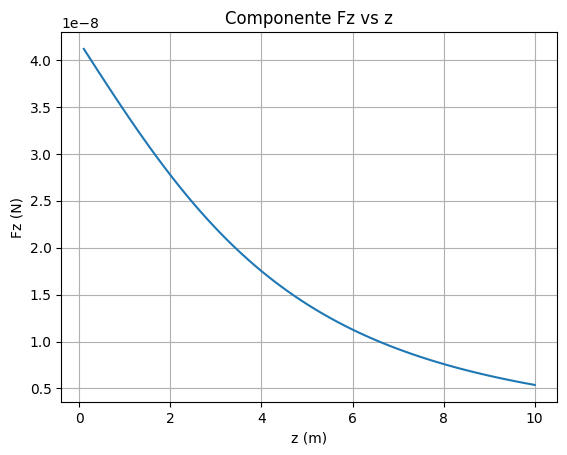

In [23]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

# Parámetros físicos
G = 6.674e-11  # constante de gravitación universal
M = 10000      # masa total de la lámina (kg)
L = 10         # longitud del lado (m)
sigma = M / (L**2)  # densidad superficial

a = -L/2
b = L/2

# Integrando que depende de z
def integrando(y, x, z):
    return 1 / (x**2 + y**2 + z**2)**(3/2)

# Rango de z (evitamos z = 0 para evitar divergencia)
z_vals = np.linspace(0.1, 10, 100)
Fz_vals = []

for z in z_vals:
    integral, _ = dblquad(integrando, a, b, lambda x: a, lambda x: b, args=(z,))
    Fz = G * sigma * z * integral
    Fz_vals.append(Fz)

# Imprimir el valor de la ultima integral (para z = 10 m)
print(f'Valor numerico de la integral cuando z = {z_vals[-1]:.1f} m: {integral:.6e}')

# Representación grafica
plt.plot(z_vals, Fz_vals)
plt.xlabel('z (m)')
plt.ylabel('Fz (N)')
plt.title('Componente Fz vs z')
plt.grid(True)
plt.show()